In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkodati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
##from textblob import TextBlob

import pandas as pd

dataframe = pd.read_csv('Product_Name_data.csv')

Amz_reviews_dataframe=dataframe[['product.name','reviews.date','reviews.text']]

Amz_reviews_dataframe

,product.name,reviews.date,reviews.text
0,Fire Tablet,2017-01-13T00:00:00.000Z,This product so far has not disappointed. My c...
1,Fire Tablet,2017-01-13T00:00:00.000Z,great for beginner or experienced person. Boug...
2,Fire Tablet,2017-01-13T00:00:00.000Z,Inexpensive tablet for him to use and learn on...
3,Fire Tablet,2017-01-13T00:00:00.000Z,I've had my Fire HD 8 two weeks now and I love...
4,Fire Tablet,2017-01-12T00:00:00.000Z,I bought this for my grand daughter when she c...
...,...,...,...
29408,NaN,NaN,NaN
29409,NaN,NaN,NaN
29410,NaN,NaN,NaN
29411,NaN,NaN,NaN


In [4]:
Stock_Price=pd.read_csv('StockPrice_Vix_2014_2017.csv')

In [5]:
#to find null value in each column
total = Amz_reviews_dataframe.isnull().sum().sort_values(ascending = False)
null_percentage = (Amz_reviews_dataframe.isnull().sum() / Amz_reviews_dataframe.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, null_percentage], axis=1, keys=['Total', 'Percentage']).transpose()

,reviews.date,reviews.text,product.name
Total,1540.00000,1514.000000,1513.000000
Percentage,5.23578,5.147384,5.143984


In [6]:
##remove null values
Amz_reviews_dataframe
Amz_reviews_dataframe = Amz_reviews_dataframe.dropna(axis=0, subset=['product.name'])
Amz_reviews_dataframe = Amz_reviews_dataframe.dropna(axis=0, subset=['reviews.date'])
Amz_reviews_dataframe = Amz_reviews_dataframe.dropna(axis=0, subset=['reviews.text'])

In [7]:
total = Amz_reviews_dataframe.isnull().sum().sort_values(ascending = False)
null_percentage = (Amz_reviews_dataframe.isnull().sum() / Amz_reviews_dataframe.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, null_percentage], axis=1, keys=['Total', 'Percentage']).transpose()

,reviews.text,reviews.date,product.name
Total,0.0,0.0,0.0
Percentage,0.0,0.0,0.0


In [8]:
Amz_reviews_dataframe['reviews.date']=Amz_reviews_dataframe['reviews.date'].str[0:10]
Amz_reviews_dataframe['reviews.date']=pd.to_datetime(Amz_reviews_dataframe['reviews.date'])

In [9]:
Amz_reviews_dataframe
#Amz_reviews_dataframe['reviews.date'].year.unique()

,product.name,reviews.date,reviews.text
0,Fire Tablet,2017-01-13,This product so far has not disappointed. My c...
1,Fire Tablet,2017-01-13,great for beginner or experienced person. Boug...
2,Fire Tablet,2017-01-13,Inexpensive tablet for him to use and learn on...
3,Fire Tablet,2017-01-13,I've had my Fire HD 8 two weeks now and I love...
4,Fire Tablet,2017-01-12,I bought this for my grand daughter when she c...
...,...,...,...
27895,Kindle,2016-08-16,This is my new favorite device. While not perf...
27896,Kindle,2016-08-16,I got this to basically experiment with. Strai...
27897,Kindle,2016-08-15,Good product that does the basics. Too bad you...
27898,Kindle,2016-08-14,This is great for a connected home. People who...


In [10]:
## Change the reviews type to string
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].astype(str)
 
## Lowercase all reviews
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Amz_reviews_dataframe['reviews.text'][2] ## to see the difference

'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

In [11]:
## remove punctuation
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].str.replace('[^\w\s]','')
Amz_reviews_dataframe['reviews.text'][2]

'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

In [12]:
## remove stopwords
stop = stopwords.words('english')
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Amz_reviews_dataframe['reviews.text'][2]

'inexpensive tablet use learn step nabi thrilled learn skype already'

In [13]:
##stemming
st = PorterStemmer()
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
Amz_reviews_dataframe['reviews.text'][2]

'inexpens tablet use learn step nabi thrill learn skype alreadi'

In [14]:
# now let's forget about the compound, and only use the pos and neg scores. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
analyzer=SentimentIntensityAnalyzer()

def sentiment_score(x):
    return analyzer.polarity_scores(x)   

def sentiment(x):
    
    lists = list(x.split(" "))  
    count_pos=0
    count_neg=0
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] >= 0.05: 
            count_pos+=1
        elif scores['compound'] <= - 0.05: 
            count_neg+=1
    if count_pos>count_neg:
        return 1
    elif count_neg>count_pos:
        return 0
    else:
        return 0.5
    
def blob_sentiment(x):
    
    blob=TextBlob(x.strip('\n'))
    if blob.sentiment.polarity>0: 
        return 1
    elif blob.sentiment.polarity<=0:
        return 0
    
Amz_reviews_dataframe['sentiment_score'] = Amz_reviews_dataframe['reviews.text'].apply(sentiment_score)
Amz_reviews_dataframe['sentiment'] = Amz_reviews_dataframe['reviews.text'].apply(sentiment)
Amz_reviews_dataframe['blob_sentiment'] = Amz_reviews_dataframe['reviews.text'].apply(blob_sentiment)

In [15]:
Amz_reviews_dataframe

,product.name,reviews.date,reviews.text,sentiment_score,sentiment,blob_sentiment
0,Fire Tablet,2017-01-13,product far disappoint children love use like ...,"{'neg': 0.139, 'neu': 0.515, 'pos': 0.345, 'co...",1.0,1
1,Fire Tablet,2017-01-13,great beginn experienc person bought gift love,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",1.0,1
2,Fire Tablet,2017-01-13,inexpens tablet use learn step nabi thrill lea...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",1.0,0
3,Fire Tablet,2017-01-13,ive fire hd 8 two week love tablet great value...,"{'neg': 0.058, 'neu': 0.565, 'pos': 0.377, 'co...",1.0,1
4,Fire Tablet,2017-01-12,bought grand daughter come visit set user ente...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",1.0,1
...,...,...,...,...,...,...
27895,Kindle,2016-08-16,new favorit devic perfect lot un useon featur ...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",1.0,1
27896,Kindle,2016-08-16,got basic experi straight box realli impress n...,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",1.0,1
27897,Kindle,2016-08-15,good product basic bad buy specif light contro...,"{'neg': 0.121, 'neu': 0.718, 'pos': 0.161, 'co...",1.0,1
27898,Kindle,2016-08-14,great connect home peopl use buy plan make eve...,"{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...",1.0,1


In [25]:
agg1=Amz_reviews_dataframe.query('sentiment == 1').groupby(['product.name']).agg(Count_positive = ('sentiment','count'))
agg2=Amz_reviews_dataframe.query('sentiment == 0').groupby(['product.name']).agg(count_negative = ('sentiment','count'))
agg3=Amz_reviews_dataframe.query('sentiment == 0.5').groupby(['product.name']).agg(count_neutral = ('sentiment','count'))

#agg2=Amz_reviews_dataframe.groupby(['reviews.date']).agg(Total_count = ('sentiment','count'))
#agg1=pd.DataFrame()
#agg1['reviews.date']=Amz_reviews_dataframe['reviews.date']
#agg1['reviews.text'] = Amz_reviews_dataframe[['reviews.date','reviews.text']].groupby(['reviews.date'])['reviews.text'].transform(lambda x: ','.join(x))
#agg1=agg1[['reviews.text','reviews.date']].drop_duplicates()
agg1=pd.DataFrame(agg1)
agg1.columns

Index(['Count_positive'], dtype='object')

In [26]:
merged_inner_1 = pd.merge(left=agg1,right=agg2, left_on='product.name', right_on='product.name')
merged_inner_2 = pd.merge(left=merged_inner_1,right=agg3, left_on='product.name', right_on='product.name')
#merged_inner_2['Total_Count']=
merged_inner_2
#merged_inner_2['productname']=agg1['product.name']

,Count_positive,count_negative,count_neutral
product.name,,,
Charger & Power Adapter,165,13,74
Echo,2897,54,361
Fire TV,2265,40,238
Fire Tablet,13556,672,2040
Kindle,4259,172,728
Tap,271,13,34


In [ ]:
positive=Amz_reviews_dataframe.query('sentiment == 1').groupby(['product.name'])

Text(0.5, 1.0, 'Data distribution for each product')

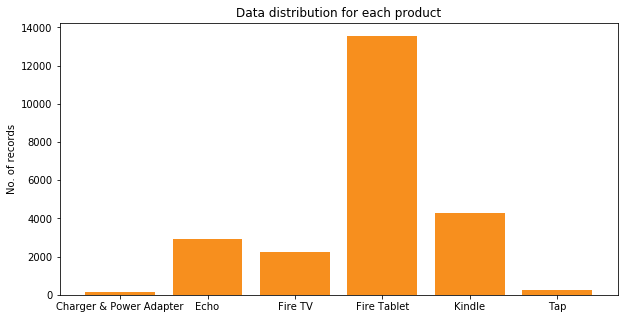

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(merged_inner_2.index,merged_inner_2['Count_positive'],color='#F78F1E')
ax.set_ylabel('No. of records')

# Set the chart's title
ax.set_title('Data distribution for each product')

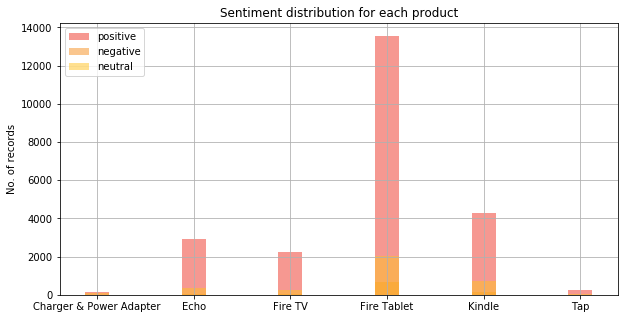

In [29]:
# Setting the positions and width for the bars
pos = list(range(len(merged_inner_2['Count_positive']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar( merged_inner_2.index,
        #using df['pre_score'] data,
        merged_inner_2['Count_positive'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=merged_inner_2.index) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar(merged_inner_2.index, 
        #using df['mid_score'] data,
        merged_inner_2['count_negative'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=merged_inner_2.index)  

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar(merged_inner_2.index, 
        #using df['post_score'] data,
        merged_inner_2['count_neutral'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=merged_inner_2.index) 

# Set the y axis label
ax.set_ylabel('No. of records')

# Set the chart's title
ax.set_title('Sentiment distribution for each product')



# Adding the legend and showing the plot
plt.legend(['positive', 'negative', 'neutral'], loc='upper left')
plt.grid()
plt.show()

<Figure size 1600x1600 with 0 Axes>

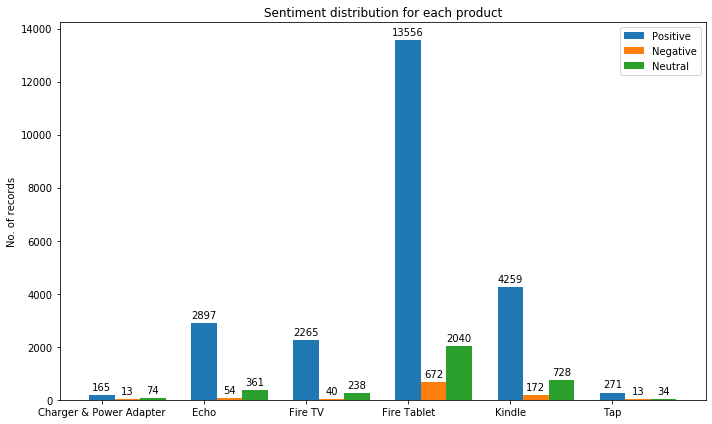

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')


labels = merged_inner_2.index
positive_rating = merged_inner_2['Count_positive']
negative_rating = merged_inner_2['count_negative']
neutral_rating = merged_inner_2['count_neutral']

x = np.arange(len(labels))  # the label locations
width = 0.25 # the width of the bars
r1 = np.arange(len(positive_rating ))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(r1, positive_rating, width, label='Positive')
rects2 = ax.bar(r2, negative_rating, width, label='Negative')
rects3 = ax.bar(r3, neutral_rating, width, label='Neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
# Set the y axis label
ax.set_ylabel('No. of records')

# Set the chart's title
ax.set_title('Sentiment distribution for each product')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [48]:
analyzer=SentimentIntensityAnalyzer()

def positive_words(x):      
    lists = list(x.split(" "))  
    count_pos=0
    total=len(lists)
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] >= 0.05: 
            count_pos+=1
    return count_pos/total

def negative_words(x):      
    lists = list(x.split(" "))  
    count_neg=0
    total=len(lists)
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] < 0.05: 
            count_neg+=1
    return count_neg/total

    
agg1['% positive words'] = Amz_reviews_dataframe['reviews.text'].apply(positive_words)
agg1['% negative words'] = Amz_reviews_dataframe['reviews.text'].apply(negative_words)

In [50]:
agg1

,reviews.text,reviews.date,% positive words,% negative words
0,product far disappoint children love use like ...,2017-01-13,0.153846,0.846154
4,bought grand daughter come visit set user ente...,2017-01-12,0.096154,0.903846
8,great devic read book like link borrow librari...,2017-01-23,0.111111,0.888889
16,nice reader almost perfect wantne good bargain...,2017-01-24,0.571429,0.428571
24,great size easi carri travel need spend time l...,2017-01-27,0.055556,0.944444
...,...,...,...,...
21448,great starter tablet kid adult alik alway grea...,2017-06-28,0.181818,0.818182
21492,love big reader enjoy fire beacus get read sur...,2017-07-05,0.166667,0.833333
23865,speaker microphon work great work great samsun...,2017-08-10,0.137931,0.862069
25330,pleas echo alexa use util chang temp via nest ...,2017-09-05,0.076923,0.923077


In [23]:
prod=pd.DataFrame()
prod['name']=Amz_reviews_dataframe['name']
prod['reviews.text'] = Amz_reviews_dataframe[['reviews.date','reviews.text']].groupby(['reviews.date'])['reviews.text'].transform(lambda x: ','.join(x))
prod=prod[['reviews.text','name']].drop_duplicates()
prod

,reviews.text,name
0,product far disappoint children love use like ...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
4,bought grand daughter come visit set user ente...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
8,great devic read book like link borrow librari...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
16,nice reader almost perfect wantne good bargain...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
24,great size easi carri travel need spend time l...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
...,...,...
27894,"definit excel kindl price cant beat,give away ...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...
27895,tablet afford supper use amazon kinda person d...,New Amazon Kindle Fire Hd 9w Powerfast Adapter...
27897,"great tablet kid children love,bought young gr...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...
27898,"grandson realli enjoy product stand well use,w...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...


In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

def total_words(x):      
    lists = list(x.split(" "))  
    total=len(lists)
    return total    

def positive_words(x):      
    lists = list(x.split(" "))  
    count_pos=0
    total=len(lists)
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] >= 0.05: 
            count_pos+=1
    return count_pos

def negative_words(x):      
    lists = list(x.split(" "))  
    count_neg=0
    total=len(lists)
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] < 0.05: 
            count_neg+=1
    return count_neg

prod['total_words'] = Amz_reviews_dataframe['reviews.text'].apply(total_words)
prod['positive_words'] = Amz_reviews_dataframe['reviews.text'].apply(positive_words)
prod['negative_words'] = Amz_reviews_dataframe['reviews.text'].apply(negative_words)
prod

,reviews.text,name,total_words,positive_words,negative_words
0,product far disappoint children love use like ...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",13,2,11
4,bought grand daughter come visit set user ente...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",52,5,47
8,great devic read book like link borrow librari...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",27,3,24
16,nice reader almost perfect wantne good bargain...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",7,4,3
24,great size easi carri travel need spend time l...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",18,1,17
...,...,...,...,...,...
27894,"definit excel kindl price cant beat,give away ...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,43,6,37
27895,tablet afford supper use amazon kinda person d...,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,71,6,65
27897,"great tablet kid children love,bought young gr...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,44,3,41
27898,"grandson realli enjoy product stand well use,w...",New Amazon Kindle Fire Hd 9w Powerfast Adapter...,15,1,14


In [25]:
prod.to_csv('results5.csv')

In [32]:
del[[products]]

In [41]:
import pandas as pd

df = pd.read_csv('Products.csv')

products=df[['name','total_words','positive_words','negative_words']]

products

,name,total_words,positive_words,negative_words
0,Fire Tablet,13,2,11
1,Fire Tablet,52,5,47
2,Fire Tablet,7,4,3
3,Fire Tablet,18,1,17
4,Fire Tablet,8,3,5
...,...,...,...,...
3251,Kindle,43,6,37
3252,Kindle,71,6,65
3253,Kindle,44,3,41
3254,Kindle,15,1,14


In [34]:
#products=df[['New Name','total_words','positive_words','negative_words']]
#products = products.dropna(axis=0, subset=['New Name'])
#products = products.dropna(axis=0, subset=['total_words'])
#products = products.dropna(axis=0, subset=['positive_words'])
#products = products.dropna(axis=0, subset=['negative_words'])
#products

,New Name,total_words,positive_words,negative_words
0,Fire Tablet,13,2,11
1,Fire Tablet,52,5,47
3,,easi use love color daughter love easi set hap...,search around perfect tablet 3 year old test t...,give product 10 ton great learn program
4,Fire Tablet,7,4,3
5,Fire Tablet,18,1,17
...,...,...,...,...
3377,Kindle,43,6,37
3378,Kindle,71,6,65
3379,Kindle,44,3,41
3380,Kindle,15,1,14


In [48]:
del[[agg1,agg2,agg3,merged_inner_1,merged_inner_2]]
agg1=products.groupby(['name']).agg(positive_words = ('positive_words','sum'))
agg2=products.groupby(['name']).agg(negative_words = ('negative_words','sum'))
agg3=products.groupby(['name']).agg(total_words = ('total_words','sum'))

In [49]:
merged_inner_1 = pd.merge(left=agg1,right=agg2, left_on='name', right_on='name')
merged_inner_2 = pd.merge(left=merged_inner_1,right=agg3, left_on='name', right_on='name')
merged_inner_2['% of positive word']=merged_inner_2['positive_words']/merged_inner_2['total_words']
merged_inner_2['% of negative word']=merged_inner_2['negative_words']/merged_inner_2['total_words']
merged_inner_2

,positive_words,negative_words,total_words,% of positive word,% of negative word
name,,,,,
Charger & Power Adapter,119,787,906,0.131347,0.868653
Echo Dot,559,3504,4063,0.137583,0.862417
Fire Tablet,347,2804,3151,0.110124,0.889876
Fire TV,503,3093,3596,0.139878,0.860122
Fire Tablet,3108,20482,23590,0.131751,0.868249
Kindle,3112,22223,25335,0.122834,0.877166
Protective Case,11,96,107,0.102804,0.897196
Tap,29,236,265,0.109434,0.890566


In [ ]:
plt.bar(merged_inner_2)

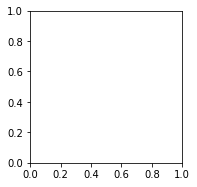

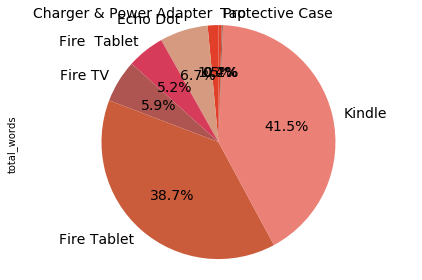

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

ax1 = plt.subplot(121, aspect='equal')
merged_inner_2.plot(kind='pie', y = ['total_words'], radius=1.8 * 100000, autopct='%1.1f%%', 
 startangle=90, colors=colors, shadow=False, legend = False, fontsize=14)

# Create a pie chart
''''
plt.pie(
    
    shadow=False,
       
    startangle=90,
    )'''

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [42]:
#Stock_Price['month_year'] = Stock_Price['Year'].map(str)+'-'+Stock_Price['Month'].map(str)
#Stock_Price['month_year'] = pd.to_datetime(Stock_Price['month_year']).dt.to_period('M')
Stock_Price['Date']=pd.to_datetime(Stock_Price['Date'])
Stock_Price

,Date,Stock Adj Close,VIX Close
0,2014-01-02,397.970001,14.23
1,2014-01-03,396.440002,13.76
2,2014-01-06,393.630005,13.55
3,2014-01-07,398.029999,12.92
4,2014-01-08,401.920013,12.87
...,...,...,...
1253,2018-12-24,1343.960000,36.07
1254,2018-12-26,1470.900000,30.41
1255,2018-12-27,1461.640000,29.96
1256,2018-12-28,1478.020000,28.34


In [51]:
dataset_v2=pd.merge(left=agg1,right=Stock_Price, left_on='reviews.date', right_on='Date')
dataset_v2

,reviews.text,reviews.date,% positive words,% negative words,Date,Stock Adj Close,VIX Close
0,product far disappoint children love use like ...,2017-01-13,0.153846,0.846154,2017-01-13,817.14,11.23
1,bought grand daughter come visit set user ente...,2017-01-12,0.096154,0.903846,2017-01-12,813.64,11.54
2,great devic read book like link borrow librari...,2017-01-23,0.111111,0.888889,2017-01-23,817.88,11.77
3,nice reader almost perfect wantne good bargain...,2017-01-24,0.571429,0.428571,2017-01-24,822.44,11.07
4,great size easi carri travel need spend time l...,2017-01-27,0.055556,0.944444,2017-01-27,835.77,10.58
...,...,...,...,...,...,...,...
683,great starter tablet kid adult alik alway grea...,2017-06-28,0.181818,0.818182,2017-06-28,990.33,10.03
684,love big reader enjoy fire beacus get read sur...,2017-07-05,0.166667,0.833333,2017-07-05,971.40,11.07
685,speaker microphon work great work great samsun...,2017-08-10,0.137931,0.862069,2017-08-10,956.92,16.04
686,pleas echo alexa use util chang temp via nest ...,2017-09-05,0.076923,0.923077,2017-09-05,965.27,12.23


In [52]:
final_dataset=dataset_v2[['Date',"% positive words","% negative words","Stock Adj Close","VIX Close"]]
final_dataset

,Date,% positive words,% negative words,Stock Adj Close,VIX Close
0,2017-01-13,0.153846,0.846154,817.14,11.23
1,2017-01-12,0.096154,0.903846,813.64,11.54
2,2017-01-23,0.111111,0.888889,817.88,11.77
3,2017-01-24,0.571429,0.428571,822.44,11.07
4,2017-01-27,0.055556,0.944444,835.77,10.58
...,...,...,...,...,...
683,2017-06-28,0.181818,0.818182,990.33,10.03
684,2017-07-05,0.166667,0.833333,971.40,11.07
685,2017-08-10,0.137931,0.862069,956.92,16.04
686,2017-09-05,0.076923,0.923077,965.27,12.23


In [53]:
final_dataset.corr()

,% positive words,% negative words,Stock Adj Close,VIX Close
% positive words,1.000000,-1.000000,0.182569,-0.117514
% negative words,-1.000000,1.000000,-0.182569,0.117514
Stock Adj Close,0.182569,-0.182569,1.000000,-0.557942
VIX Close,-0.117514,0.117514,-0.557942,1.000000


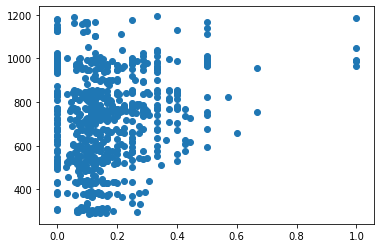

In [47]:
plt.scatter(final_dataset['% positive words'],final_dataset['Stock Adj Close'])

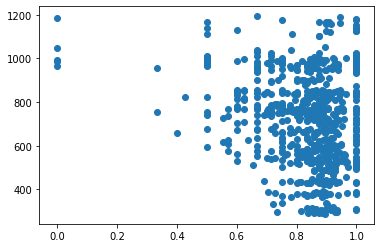

In [54]:
plt.scatter(final_dataset['% negative words'],final_dataset['Stock Adj Close'])

In [79]:
final_dataset.to_csv("final_dataset.csv")

## Using Linear regression for forecasting

In [55]:
test=final_dataset
test['Previous Month SP']=test['Stock Adj Close'].shift()
test['2nd Previous Month SP']=test['Stock Adj Close'].shift(2)
test['Previous Month SP']= test['Previous Month SP'].replace(np.NaN,0)
test['2nd Previous Month SP']=test['2nd Previous Month SP'].replace(np.NaN,0)
test

C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,% positive words,% negative words,Stock Adj Close,VIX Close,Previous Month SP,2nd Previous Month SP
0,2017-01-13,0.153846,0.846154,817.14,11.23,0.000000,0.000000
1,2017-01-12,0.096154,0.903846,813.64,11.54,817.140000,0.000000
2,2017-01-23,0.111111,0.888889,817.88,11.77,813.640000,817.140000
3,2017-01-24,0.571429,0.428571,822.44,11.07,817.880000,813.640000
4,2017-01-27,0.055556,0.944444,835.77,10.58,822.440000,817.880000
...,...,...,...,...,...,...,...
683,2017-06-28,0.181818,0.818182,990.33,10.03,437.390015,488.100006
684,2017-07-05,0.166667,0.833333,971.40,11.07,990.330000,437.390015
685,2017-08-10,0.137931,0.862069,956.92,16.04,971.400000,990.330000
686,2017-09-05,0.076923,0.923077,965.27,12.23,956.920000,971.400000


In [62]:
#test['Date'] = pd.to_datetime(test.month_year,format='%Y-%m-%d')

#setting index as date values
test.index = test['Date']

#sorting
data = test.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(test)),columns=['% positive words','VIX Close','Previous Month SP',
                                                         '2nd Previous Month SP','Stock Adj Close'])
#new_data=data

for i in range(0,len(data)):
   new_data['Stock Adj Close'][i] = data['Stock Adj Close'][i]
   new_data['% positive words'][i] = data['% positive words'][i]
   new_data['VIX Close'][i] = data['VIX Close'][i]
   new_data['Previous Month SP'][i] = data['Previous Month SP'][i]
   new_data['2nd Previous Month SP'][i] = data['2nd Previous Month SP'][i]

new_data['Year']=pd.DatetimeIndex(data['Date']).year
new_data['Month']=pd.DatetimeIndex(data['Date']).month
new_data['Day']=pd.DatetimeIndex(data['Date']).day

In [63]:
new_data

,% positive words,VIX Close,Previous Month SP,2nd Previous Month SP,Stock Adj Close,Year,Month,Day
0,0.0993789,13.37,387.83,383.54,333.62,2014,4,3
1,0.0795455,15.57,333.62,387.83,317.76,2014,4,7
2,0.1,12.91,310.05,296.93,308.01,2014,5,2
3,0.142857,13.29,296.93,712.24,310.05,2014,5,5
4,0.0659341,13.8,308.01,310.05,297.38,2014,5,6
...,...,...,...,...,...,...,...,...
683,1,10.03,1177.62,1168.36,1187.38,2017,12,19
684,0,9.72,1168.36,987.2,1177.62,2017,12,20
685,0.1,9.9,987.2,1000.93,1168.36,2017,12,22
686,0,10.47,1169.47,1105.28,1182.26,2017,12,27


In [64]:
#split into train and validation
train = new_data[:500]
#train=train.drop('month_year',axis=1)
valid = new_data[500:]
#valid=valid.drop('month_year',axis=1)

x_train = train.drop('Stock Adj Close', axis=1)
y_train = train['Stock Adj Close']
x_valid = valid.drop('Stock Adj Close', axis=1)
y_valid = valid['Stock Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#make predictions
y_pred = model.predict(x_valid)

In [66]:
from sklearn.metrics import mean_squared_error,r2_score

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(y_pred)),2)))
print("Root Mean Square Error",rms)
mse=mean_squared_error(y_valid, y_pred, multioutput='raw_values')
print("Mean Squared Error: ",mse[0])

Root Mean Square Error 52.20941291189253
Mean Squared Error:  2725.8227966044888


Rsquare:
R2 score= 1 — (Error from Linear Regression Model/Simple average model).
Best possible score is 1.0 and it can be negative 

In [67]:
r2=r2_score(y_valid, y_pred, multioutput='variance_weighted')
print("Rsquare value: ",r2)

Rsquare value:  0.6026868641803811


C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


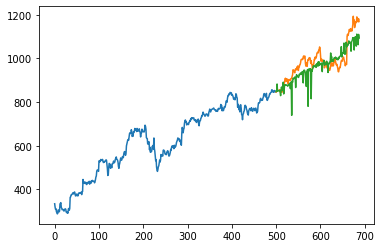

In [71]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = y_pred

valid.index = new_data[500:].index
train.index = new_data[:500].index

plt.plot(train['Stock Adj Close'])
plt.plot(valid[['Stock Adj Close', 'Predictions']])

## Using Neural Network models

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)